In [37]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy import integrate

from tqdm.auto import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc_file
rc_file('matplotlibrc')

mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

## 1. No frequency dependence

In [2]:
# nfw
r_s = 1
def n_NFW(r):
    return 1/((r/r_s)*(1+r/r_s)**2)

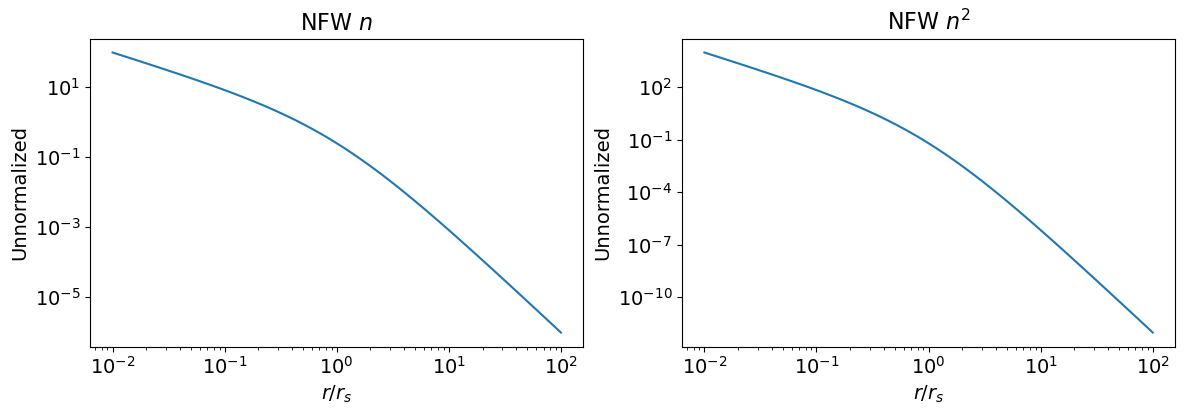

In [25]:
r_arr = np.logspace(-2, 2, 100)
n_arr = np.array([n_NFW(r) for r in r_arr])

fig, axs = plt.subplots(1, 2, figsize=(14,4))
axs[0].plot(r_arr, n_arr)
axs[0].set(xscale='log', yscale='log')
axs[0].set(title=r'NFW $n$', xlabel=r'$r/r_s$', ylabel=r'Unnormalized')

axs[1].plot(r_arr, n_arr**2)
axs[1].set(xscale='log', yscale='log')
axs[1].set(title=r'NFW $n^2$', xlabel=r'$r/r_s$', ylabel=r'Unnormalized');

### 1.1 Just emission: integrate

In [69]:
r_arr = np.logspace(-1, 1, 10) # [r_s]
t_arr = np.linspace(0.01, np.pi, 100) # theta [rad]

decay_Iss = []
for r in tqdm(r_arr):
    Is = []
    for t in t_arr:
        b = r*np.sin(t)
        def integrand(s):
            return n_NFW(np.sqrt(s**2+b**2))
        I = integrate.quad(integrand, -200, r*np.cos(t))[0]
        Is.append(I)
    decay_Iss.append(Is)
decay_Iss = np.array(decay_Iss)

annih_Iss = []
for r in tqdm(r_arr):
    Is = []
    for t in t_arr:
        b = r*np.sin(t)
        def integrand(s):
            return n_NFW(np.sqrt(s**2+b**2))**2
        I = integrate.quad(integrand, -200, r*np.cos(t))[0]
        Is.append(I)
    annih_Iss.append(Is)
annih_Iss = np.array(annih_Iss)

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.01it/s]


[Text(0.5, 1.0, 'Annihilation $I(r,\\theta)$'),
 Text(0.5, 0, '$\\theta$ [$^\\circ$]'),
 Text(0, 0.5, '$\\log I$ [Unnormalized]')]

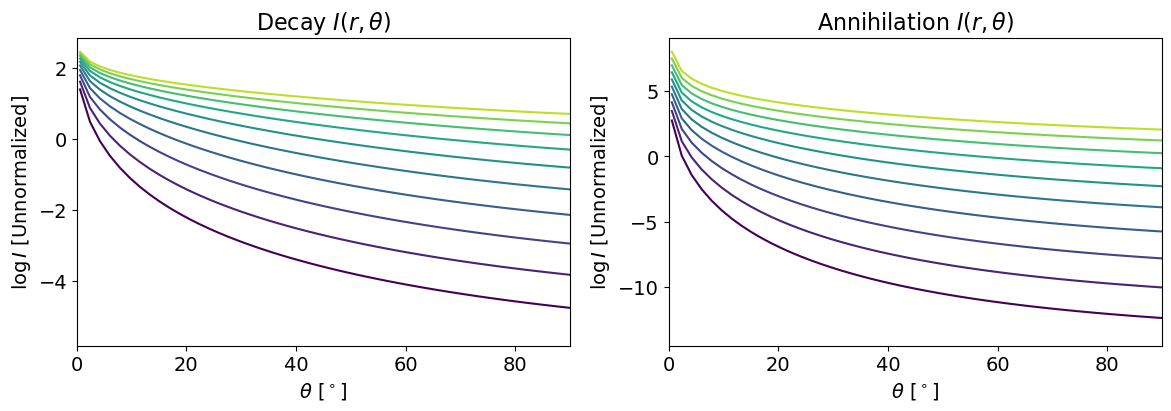

In [72]:
cmap = plt.get_cmap('viridis')

fig, axs = plt.subplots(1, 2, figsize=(14,4))
for i, Is in enumerate(decay_Iss):
    axs[0].plot(t_arr*180/np.pi, np.log(Is), color=cmap(1-(i+1)/len(Iss)))
axs[0].set(xlim=(0, 90), ylim=None)
axs[0].set(title=r'Decay $I(r,\theta)$', xlabel=r'$\theta$ [$^\circ$]', ylabel=r'$\log I$ [Unnormalized]')

for i, Is in enumerate(annih_Iss):
    axs[1].plot(t_arr*180/np.pi, np.log(Is), color=cmap(1-(i+1)/len(Iss)))
axs[1].set(xlim=(0, 90), ylim=None)
axs[1].set(title=r'Annihilation $I(r,\theta)$', xlabel=r'$\theta$ [$^\circ$]', ylabel=r'$\log I$ [Unnormalized]')

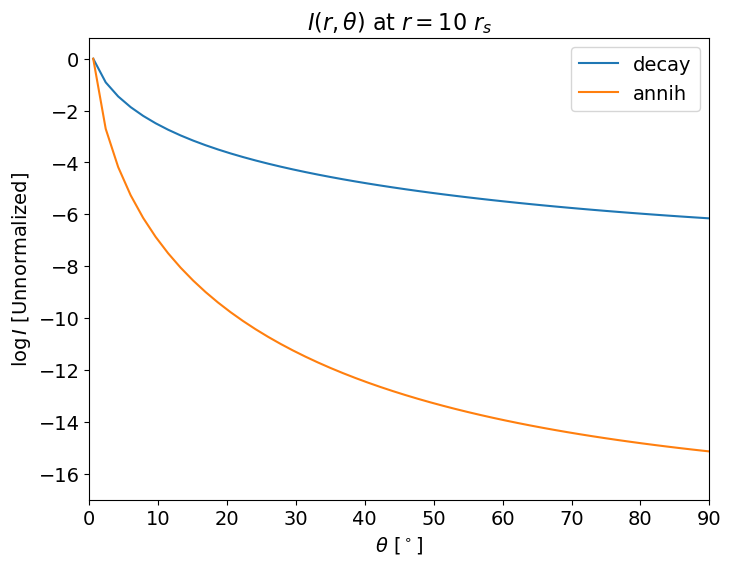

In [79]:
# benchmark point r = 10 r_s
fig, ax = plt.subplots()
ax.plot(t_arr*180/np.pi, np.log(decay_Iss[-1]/decay_Iss[-1][0]), label='decay')
ax.plot(t_arr*180/np.pi, np.log(annih_Iss[-1]/annih_Iss[-1][0]), label='annih')
ax.set(xlim=(0, 90), ylim=None)
ax.set(title=r'$I(r,\theta)$ at $r=10~r_s$', xlabel=r'$\theta$ [$^\circ$]', ylabel=r'$\log I$ [Unnormalized]')
ax.legend();

### 1.2 Emission and absorption: first order ODE